#### Daily Weather Data Analysis...
* Using Decision Tree Classifier

* Import Necessary and Unnecessary Modules..

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from IPython.display import Image

In [3]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import 
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,confusion_matrix

* Load the Dataset & let's start working on it 

In [4]:
Data = pd.read_csv('data_weather.csv')

In [5]:
# Here the Data is like a spare dataset tocome back and understand the raw data
df = Data.copy()

In [6]:
df.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [7]:
df = df.set_index('number')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1094
Data columns (total 10 columns):
air_pressure_9am          1092 non-null float64
air_temp_9am              1090 non-null float64
avg_wind_direction_9am    1091 non-null float64
avg_wind_speed_9am        1092 non-null float64
max_wind_direction_9am    1092 non-null float64
max_wind_speed_9am        1091 non-null float64
rain_accumulation_9am     1089 non-null float64
rain_duration_9am         1092 non-null float64
relative_humidity_9am     1095 non-null float64
relative_humidity_3pm     1095 non-null float64
dtypes: float64(10)
memory usage: 94.1 KB


> #### Understanding the Columns in the DataFrame
* Mostly Every Column is Measurement of the Features in the Morning 9 Am.
* Relative Humidity is Measured twice.. morning again in the evening

In [9]:
df.isna().sum()

air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

* There are some Missing Values in the Dataset..
* Let's Interpolate linearly to fill them..

In [10]:
df.iloc[:,:-2] = df.iloc[:,:-2].interpolate(method ='linear', limit_direction ='forward')

In [11]:
# Data[Data.isnull().any(axis=1)]

In [12]:
df.isna().sum()

air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

#### Data Analysations...

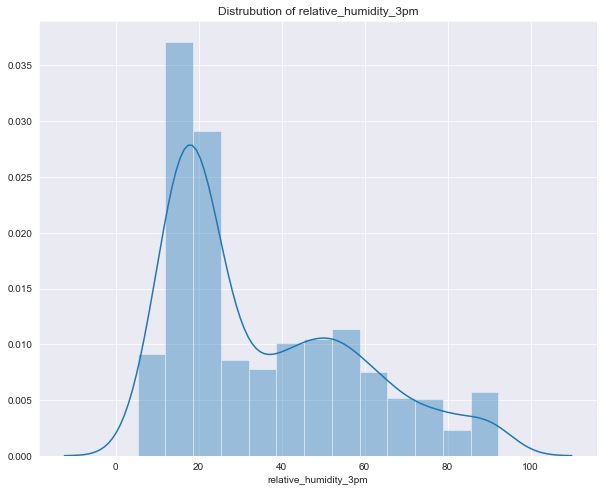

In [23]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.distplot(df['relative_humidity_3pm'])
plt.xlabel('relative_humidity_3pm')
plt.title('Distrubution of relative_humidity_3pm')
plt.show()

* The Data is not in Normal Distrubution
* The Range of Data is between 10 and 90 

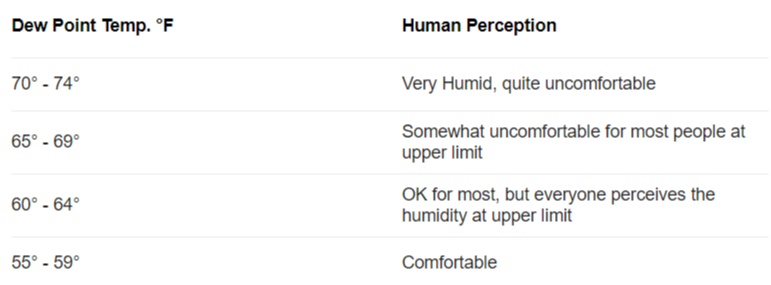

In [81]:
Image(filename='when humidity is high.png')

* As we see the Comfortable level of Humidity is Upto 59 we will make a classification @ 59

In [82]:
cdf = df.copy()
cdf['relative_humidity_3pm'] = cdf['relative_humidity_3pm'].apply(lambda x: 1 if x > 59 else 0)

In [83]:
cdf['relative_humidity_3pm'].value_counts()

0    907
1    188
Name: relative_humidity_3pm, dtype: int64

* As the Distrubution High Humidity is very less values compared to Low Humidity days

In [84]:
corr = cdf.corr()['relative_humidity_3pm']

In [85]:
corr

air_pressure_9am         -0.273593
air_temp_9am             -0.548888
avg_wind_direction_9am    0.256841
avg_wind_speed_9am        0.040453
max_wind_direction_9am    0.279179
max_wind_speed_9am        0.024617
rain_accumulation_9am     0.233954
rain_duration_9am         0.276583
relative_humidity_9am     0.754966
relative_humidity_3pm     1.000000
Name: relative_humidity_3pm, dtype: float64

In [86]:
xt,XT,yt,YT = train_test_split(cdf.iloc[:,:-1],cdf.iloc[:,-1],test_size = 0.3)

* Let's Implement Different Algorithms and Analyse them..

In [87]:
#  Instanciation of the Models
LOG = LogisticRegression()
DTC = DecisionTreeClassifier(min_samples_split=5)
RFC = RandomForestClassifier(n_estimators=500)
ABC = AdaBoostClassifier(n_estimators=100)
GBC = GradientBoostingClassifier(learning_rate=0.1)

In [88]:
log=[];dtc=[];rfc=[];abc=[];gbc=[]
for i in range(10):
    xt,XT,yt,YT = train_test_split(cdf.iloc[:,:-1],cdf.iloc[:,-1],test_size = 0.3)
#     Logistic Regression
    LOG.fit(xt,yt)
    YTP = LOG.predict(XT)
    log.append(accuracy_score(YT,YTP))
#     Decision Tree Classifier
    DTC.fit(xt,yt)
    YTP = DTC.predict(XT)
    dtc.append(accuracy_score(YT,YTP))
#     Random Forest Classifier
    RFC.fit(xt,yt)
    YTP = RFC.predict(XT)
    rfc.append(accuracy_score(YT,YTP))
#     Ada-Boost Classifier
    ABC.fit(xt,yt)
    YTP = ABC.predict(XT)
    abc.append(accuracy_score(YT,YTP))
#    Gradient Boost Classifier
    GBC.fit(xt,yt)
    YTP = GBC.predict(XT)
    gbc.append(accuracy_score(YT,YTP))

In [89]:
models = pd.DataFrame()

In [90]:
models['Accuracy_score'] = log+dtc+rfc+abc+gbc
models['Model'] = ['LOG']*10+['DTC']*10+['RFC']*10+['ABC']*10+['GBC']*10

* Model Selection

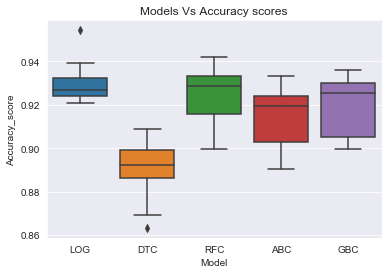

In [91]:
sns.boxplot(models['Model'],models['Accuracy_score'])
plt.title('Models Vs Accuracy scores')
plt.show()

* Logistic regression is giving us the Best accuracy and even Random Forest is best accuracy.
* As Logistic Regression is best while compared to RFC on Classification of time
* we will use Logistic Model for predictions

In [92]:
# Logistic Regression
xt,XT,yt,YT = train_test_split(cdf.iloc[:,:-1],cdf.iloc[:,-1],test_size = 0.3)
LOG.fit(xt,yt)
YTP = LOG.predict(XT)
print(accuracy_score(YT,YTP))
%time

0.939209726443769
Wall time: 0 ns


> Thank You